<a href="https://colab.research.google.com/github/sharanya-a11/sharanya/blob/main/spam%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset for visulalization

In [8]:
import numpy as np
import pandas as pd

path = '/content/drive/MyDrive/project/ spam dataset/spam.csv'
try:
    df = pd.read_csv(path, encoding='latin-1')
    print("CSV file loaded successfully with latin-1 encoding!")
    display(df.head())
except UnicodeDecodeError:
    try:
        df = pd.read_csv(path, encoding='cp1252')
        print("CSV file loaded successfully with cp1252 encoding!")
        display(df.head())
    except Exception as e:
        print(f"Could not decode the file with latin-1 or cp1252 encoding: {e}")
except FileNotFoundError:
    print("Error: Make sure the file path is correct and you have mounted your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file loaded successfully with latin-1 encoding!


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [23]:
import pandas as pd
from google.colab import drive

# Reload the data to ensure 'Unnamed' columns are present
# Assuming the drive is already mounted from a previous cell
path = '/content/drive/MyDrive/project/ spam dataset/spam.csv'
try:
    df = pd.read_csv(path, encoding='latin-1')
    print("CSV file reloaded successfully with latin-1 encoding!")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(path, encoding='cp1252')
        print("CSV file reloaded successfully with cp1252 encoding!")
    except Exception as e:
        print(f"Could not decode the file with latin-1 or cp1252 encoding during reload: {e}")
except FileNotFoundError:
    print("Error: Make sure the file path is correct and you have mounted your Google Drive.")
except Exception as e:
    print(f"An error occurred during reload: {e}")

# Now drop the columns, checking if they exist
columns_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df.drop(columns=existing_columns_to_drop, inplace=True)
    print(f"Dropped columns: {existing_columns_to_drop}")
else:
    print("Columns 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' not found in the DataFrame after reload.")

display(df.sample(5))

CSV file reloaded successfully with latin-1 encoding!
Dropped columns: ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


,v1,v2
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...
5034,ham,How many times i told in the stage all use to ...
103,ham,wow. You're right! I didn't mean to do that. I...
956,ham,"Love isn't a decision, it's a feeling. If we c..."
654,ham,Did u got that persons story


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to the 'v1' column and create a new 'target' column
if 'v1' in df.columns:
    df['target'] = encoder.fit_transform(df['v1'])
    print("Encoded 'v1' column and created 'target' column.")
    display(df.head())
else:
    print("Error: 'v1' column not found in the DataFrame.")

Encoded 'v1' column and created 'target' column.


,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [26]:
df.isnull().sum()

,0
v1,0
v2,0
target,0


In [27]:
df.duplicated().sum()


np.int64(403)

In [28]:
df =df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [29]:
df.shape

(5169, 3)

EDA

In [30]:
df.head()

,v1,v2,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [32]:
df['target'].value_counts()

,count
target,
0,4516
1,653


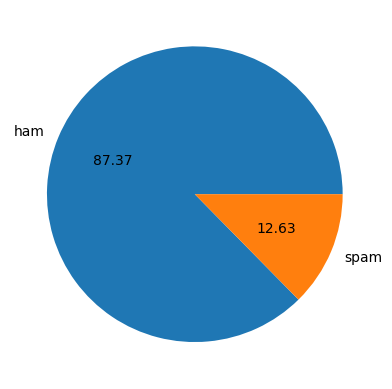

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
df['num_characters'] = df['v2'].apply(len)
df.head()

,v1,v2,target,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [40]:
import nltk
nltk.download('punkt_tab') # Download the required resource

df['num_words']= df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,v1,v2,target,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [41]:
df['num_sentences']= df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,v1,v2,target,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [42]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

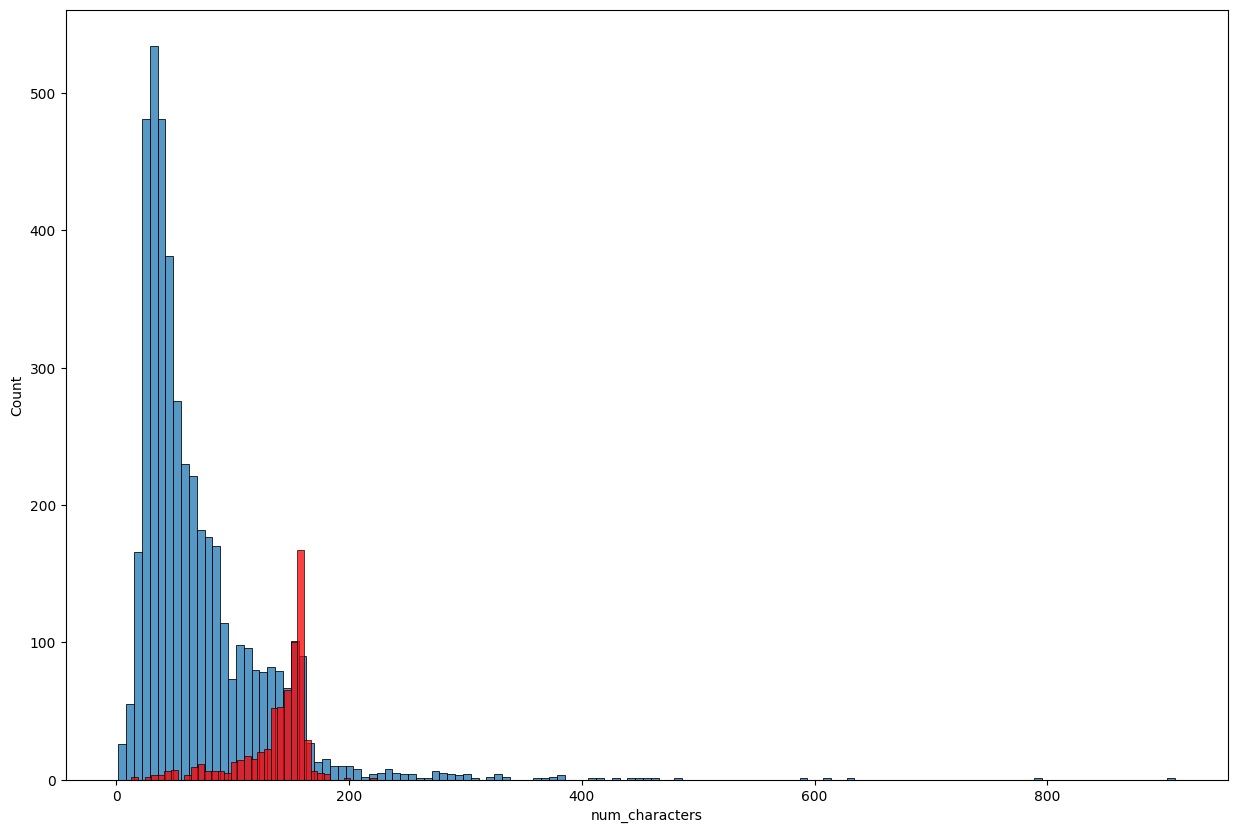

In [46]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

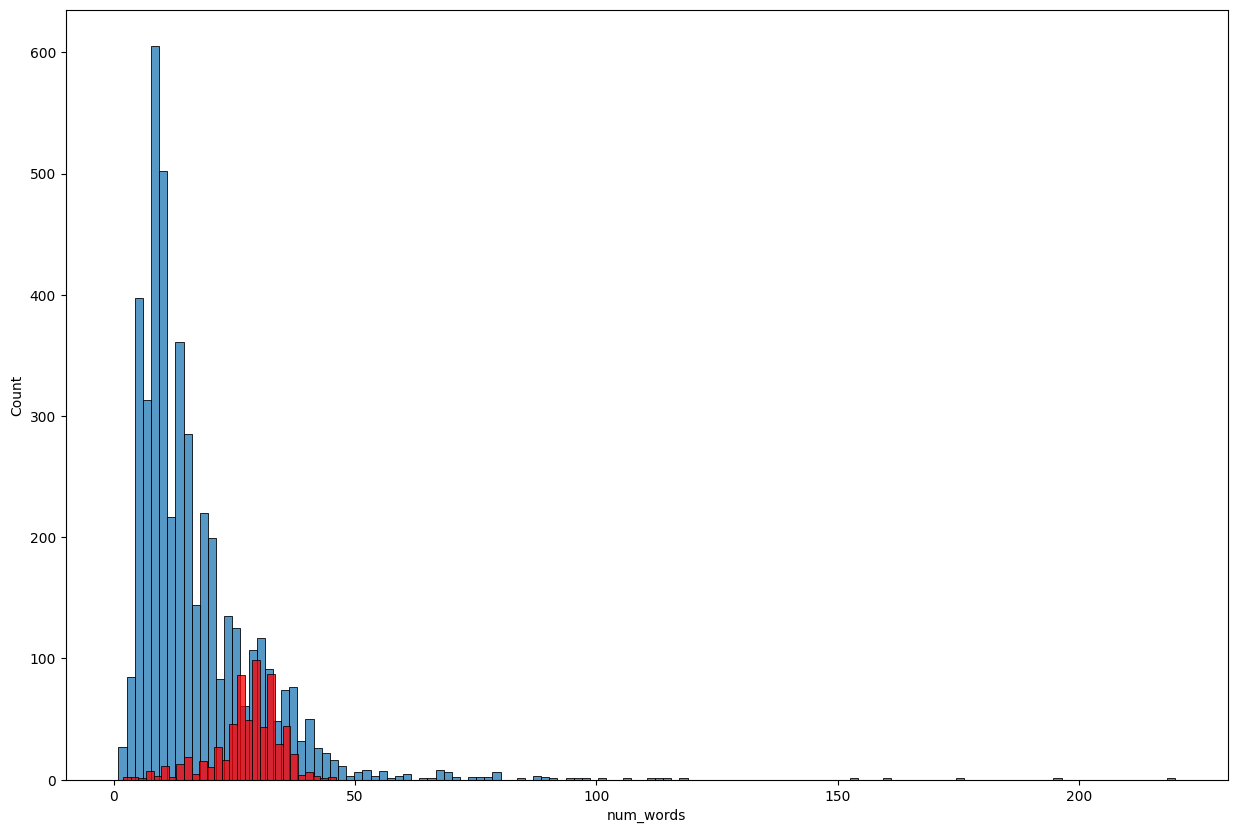

In [47]:
plt.figure(figsize=(15,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

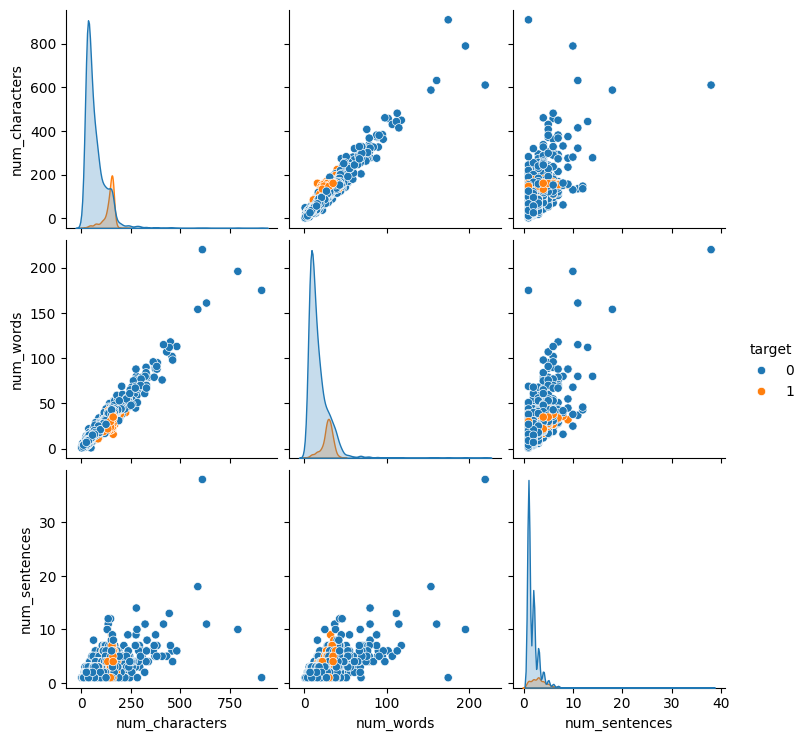

In [48]:
sns.pairplot(df,hue='target')

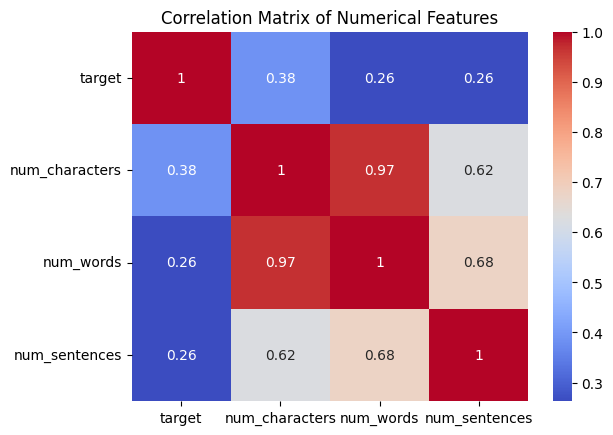

In [50]:
# Select only the numerical columns for correlation calculation
numerical_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Data Preprocessing

In [56]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download the stopwords resource
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) # Joined with space for better readability

# Apply the transformation to the 'v2' column and create a new column
df['transformed_text'] = df['v2'].apply(transform_text)

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,v1,v2,target,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


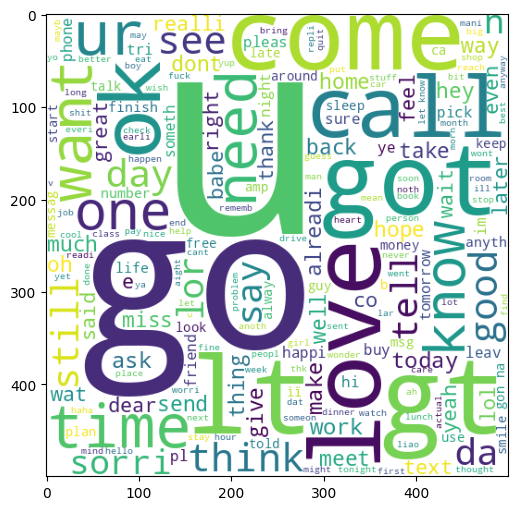

In [57]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

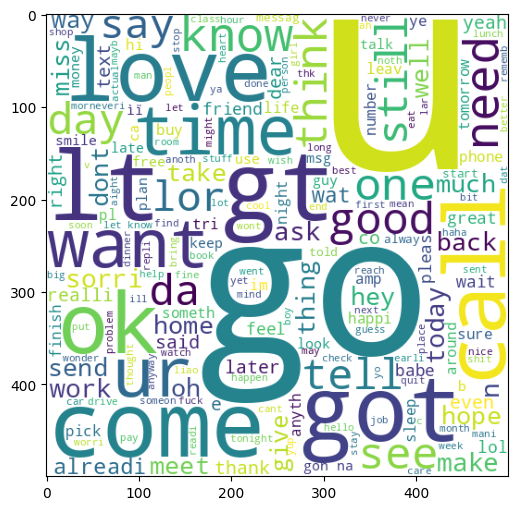

In [58]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [59]:
df.head()

,v1,v2,target,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


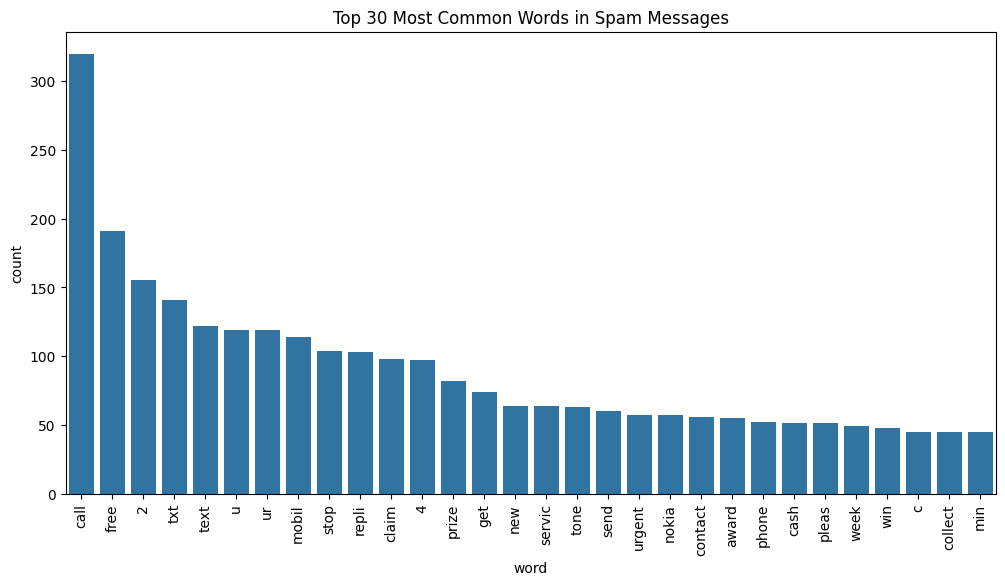

In [63]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

from collections import Counter
common_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # Added figsize for better readability
sns.barplot(x='word', y='count', data=common_spam_words) # Corrected barplot call
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Spam Messages') # Added title
plt.show()

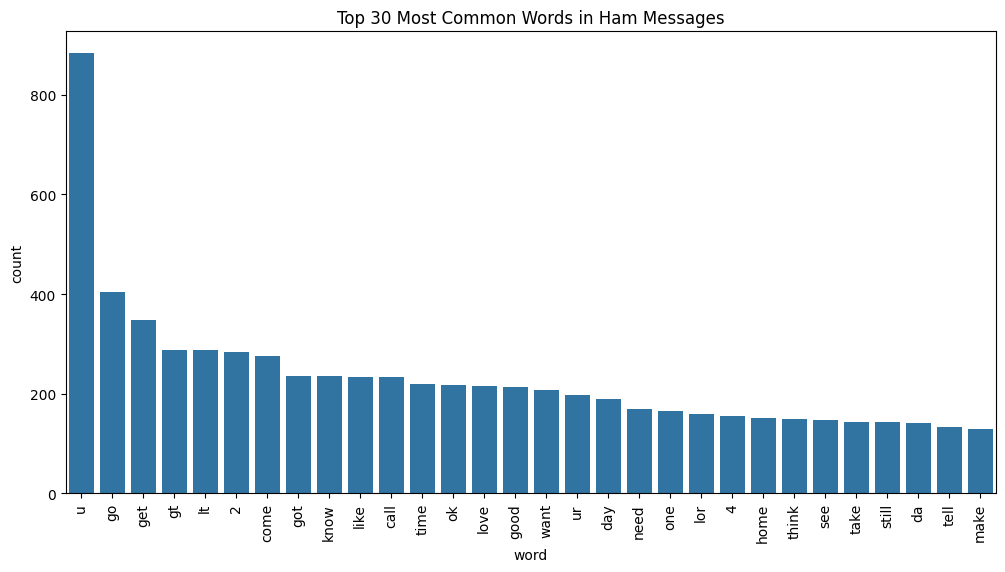

In [67]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

from collections import Counter
common_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word','count'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # Added figsize for better readability
sns.barplot(x='word', y='count', data=common_ham_words) # Corrected barplot call
plt.xticks(rotation='vertical')
plt.title('Top 30 Most Common Words in Ham Messages') # Added title
plt.show()

In [68]:
df.head()


,v1,v2,target,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


Model Building

In [70]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x= tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
x.shape

(5169, 3000)

In [76]:
y=df['target'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test,y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_gnb))
print("Precision:", precision_score(y_test,y_pred_gnb))
print("-" * 30)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test,y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_mnb))
print("Precision:", precision_score(y_test,y_pred_mnb))
print("-" * 30)


# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print("Bernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(y_test,y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_bnb))
print("Precision:", precision_score(y_test,y_pred_bnb))

Gaussian Naive Bayes:
Accuracy: 0.874274661508704
Confusion Matrix:
 [[790 106]
 [ 24 114]]
Precision: 0.5181818181818182
------------------------------
Multinomial Naive Bayes:
Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 1.0
------------------------------
Bernoulli Naive Bayes:
Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision: 0.991869918699187


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)

clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBC': gbc,
    'XGB': xgb,
    'ETC': etc
}

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred) # Renamed variable
    return accuracy,conf_matrix,precision # Return renamed variable

accuracy_scores=[]
confusion_matrices=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_confusion_matrix,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print(f"For {name}:")
    print(f"Accuracy: {current_accuracy}")
    print(f"Confusion Matrix:\n{current_confusion_matrix}")
    print(f"Precision: {current_precision}")
    accuracy_scores.append(current_accuracy)
    confusion_matrices.append(current_confusion_matrix)
    precision_scores.append(current_precision)

For SVC:
Accuracy: 0.9758220502901354
Confusion Matrix:
[[893   3]
 [ 22 116]]
Precision: 0.9747899159663865
For KN:
Accuracy: 0.9052224371373307
Confusion Matrix:
[[896   0]
 [ 98  40]]
Precision: 1.0
For NB:
Accuracy: 0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision: 1.0
For DT:
Accuracy: 0.9342359767891683
Confusion Matrix:
[[881  15]
 [ 53  85]]
Precision: 0.85
For LR:
Accuracy: 0.9555125725338491
Confusion Matrix:
[[892   4]
 [ 42  96]]
Precision: 0.96
For RF:
Accuracy: 0.9738878143133463
Confusion Matrix:
[[894   2]
 [ 25 113]]
Precision: 0.9826086956521739
For AdaBoost:
Accuracy: 0.9216634429400387
Confusion Matrix:
[[880  16]
 [ 65  73]]
Precision: 0.8202247191011236
For GBC:
Accuracy: 0.9506769825918762
Confusion Matrix:
[[889   7]
 [ 44  94]]
Precision: 0.9306930693069307
For XGB:
Accuracy: 0.9680851063829787
Confusion Matrix:
[[890   6]
 [ 27 111]]
Precision: 0.9487179487179487
For ETC:
Accuracy: 0.9748549323017408
Confusion Matrix:
[[893   3]
 [ 23 115]

In [80]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy': accuracy_scores,'Precision': precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.934236,0.850000
4,LR,0.955513,0.960000
5,RF,0.973888,0.982609
6,AdaBoost,0.921663,0.820225
7,GBC,0.950677,0.930693
8,XGB,0.968085,0.948718
9,ETC,0.974855,0.974576


In [81]:
performance_df1=pd.melt(performance_df,id_vars=['Algorithm'])
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.934236
4,LR,Accuracy,0.955513
5,RF,Accuracy,0.973888
6,AdaBoost,Accuracy,0.921663
7,GBC,Accuracy,0.950677
8,XGB,Accuracy,0.968085
9,ETC,Accuracy,0.974855


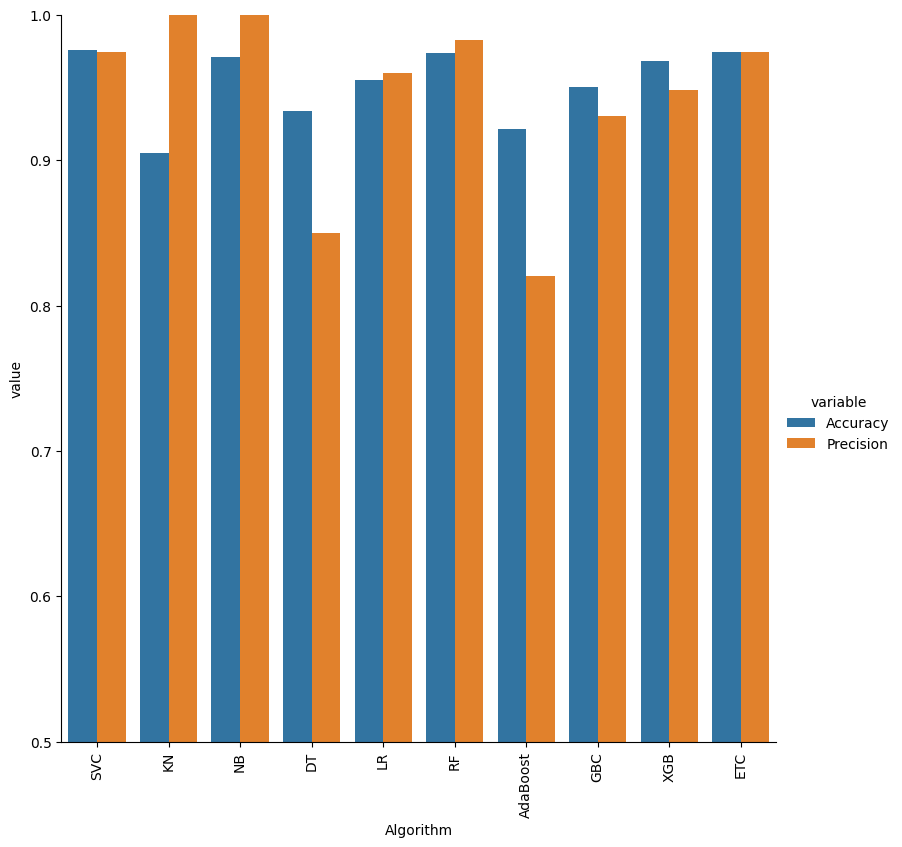

In [82]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=8)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Assuming 'accuracy_scores' and 'precision_scores' contain the results
# from the initial model training (e.g., using TF-IDF with max_features=3000)

# Create a DataFrame for the initial performance results
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

# --- Example of how you might add results from another scenario ---
# If you had another set of results (e.g., after scaling or using a different vectorizer)
# You would have new lists of accuracy and precision scores, let's call them
# accuracy_scores_scaled and precision_scores_scaled

# Create a DataFrame for the results from the second scenario
# temp_df_scaled = pd.DataFrame({
#     'Algorithm': clfs.keys(),
#     'Accuracy_scaling': accuracy_scores_scaled,
#     'Precision_scaling': precision_scores_scaled
# })

# Merge the initial performance DataFrame with the results from the second scenario
# new_df = performance_df.merge(temp_df_scaled, on='Algorithm')

# --- Example of how you might add results from a third scenario ---
# If you had a third set of results (e.g., using num_characters feature)
# accuracy_scores_num_chars and precision_scores_num_chars

# Create a DataFrame for the results from the third scenario
# temp_df_num_chars = pd.DataFrame({
#     'Algorithm': clfs.keys(),
#     'Accuracy_num_chars': accuracy_scores_num_chars,
#     'Precision_num_chars': precision_scores_num_chars # Corrected typo
# })

# Merge the current combined DataFrame with the results from the third scenario
# final_performance_df = new_df.merge(temp_df_num_chars, on='Algorithm')

# For now, let's just display the initial performance_df
display(performance_df)

# If you want to melt this DataFrame for visualization (like in the next cell)
performance_df_melted = pd.melt(performance_df, id_vars=['Algorithm'], var_name='Metric', value_name='Value')
display(performance_df_melted)

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.934236,0.850000
4,LR,0.955513,0.960000
5,RF,0.973888,0.982609
6,AdaBoost,0.921663,0.820225
7,GBC,0.950677,0.930693
8,XGB,0.968085,0.948718
9,ETC,0.974855,0.974576


,Algorithm,Metric,Value
0,SVC,Accuracy_max_ft_3000,0.975822
1,KN,Accuracy_max_ft_3000,0.905222
2,NB,Accuracy_max_ft_3000,0.970986
3,DT,Accuracy_max_ft_3000,0.934236
4,LR,Accuracy_max_ft_3000,0.955513
5,RF,Accuracy_max_ft_3000,0.973888
6,AdaBoost,Accuracy_max_ft_3000,0.921663
7,GBC,Accuracy_max_ft_3000,0.950677
8,XGB,Accuracy_max_ft_3000,0.968085
9,ETC,Accuracy_max_ft_3000,0.974855


In [86]:
svc =SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm',svc),('knn',knc),('nb',mnb),('dt',dtc),('lr',lrc),('et',etc)],voting='hard')
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9661508704061895
Confusion Matrix:
 [[896   0]
 [ 35 103]]
Precision: 1.0


In [91]:
estimators=[('svm',svc),('nb',mnb),('dt',dtc),('lr',lrc)]
final_model=VotingClassifier(estimators=estimators,voting='hard')
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=lrc)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Confusion Matrix:
 [[892   4]
 [ 17 121]]
Precision: 0.968


In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))